In [150]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
from matplotlib import pyplot
import seaborn as sns
import scipy.stats
import re
import csv

In [151]:
df = pd.read_csv('consolidated_world_leaders.csv',encoding='utf-8')

In [152]:
df.head()

,leader,tweets,sentiment
0,Boris Johnson,Latest NHS advice If you have a new continuous...,positive
1,Boris Johnson,Latest NHS advice If you have a new continuous...,positive
2,Boris Johnson,Latest NHS advice If you have a new continuous...,positive
3,Boris Johnson,Latest NHS advice If you have a new continuous...,positive
4,Boris Johnson,Latest NHS advice If you have a new continuous...,positive


In [153]:
positive = pd.DataFrame()
positive = df.loc[df['sentiment'] == 'positive']
positive.head()

,leader,tweets,sentiment
0,Boris Johnson,Latest NHS advice If you have a new continuous...,positive
1,Boris Johnson,Latest NHS advice If you have a new continuous...,positive
2,Boris Johnson,Latest NHS advice If you have a new continuous...,positive
3,Boris Johnson,Latest NHS advice If you have a new continuous...,positive
4,Boris Johnson,Latest NHS advice If you have a new continuous...,positive


In [154]:
positive['leader'].value_counts()
positive[['leader','tweets']].groupby('leader').count()

,tweets
leader,
Boris Johnson,536
Emmanuel Macron,369
Jokowi,83
Justin Trudeau,245
King Salman,95
Lee Hsien Loong,391
Lopez Obrador,53
Modi,677
Pope,163


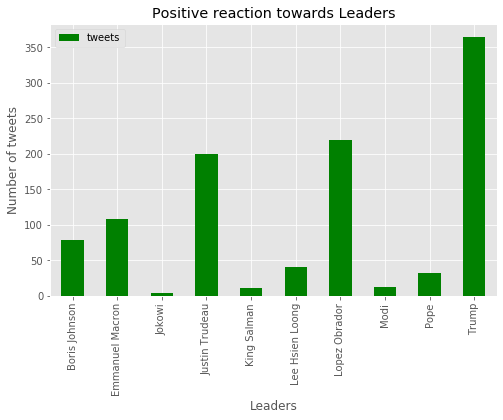

In [155]:
df1[['leader','tweets']].groupby('leader').count().plot(kind='bar',color = 'green',figsize=(8, 5), title='Positive reaction towards Leaders')
plt.xlabel('Leaders')
plt.ylabel('Number of tweets')
plt.show()

In [156]:
negative= pd.DataFrame()
negative= df.loc[df['sentiment'] == "negative"]

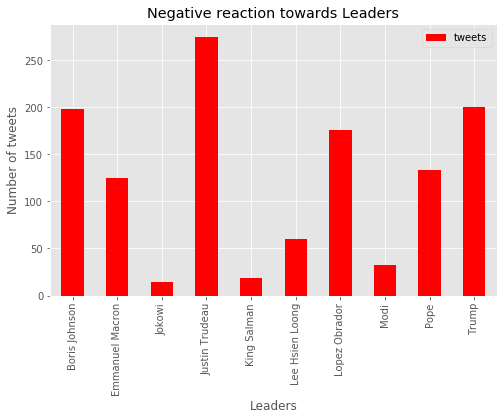

In [159]:
negative[['leader','tweets']].groupby('leader').count().plot(kind='bar',color='red',figsize=(8, 5), title='Negative reaction towards Leaders')
plt.xlabel('Leaders')
plt.ylabel('Number of tweets')
plt.show()

In [74]:
neutral= pd.DataFrame()
neutral= df.loc[df['sentiment'] == "neutral"]

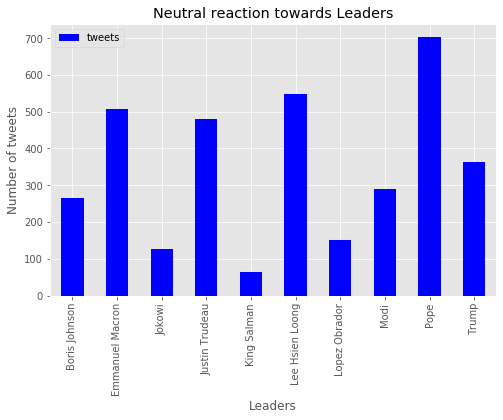

In [160]:
neutral[['leader','tweets']].groupby('leader').count().plot(kind='bar',color='blue',figsize=(8, 5), title='Neutral reaction towards Leaders')

plt.xlabel('Leaders')
plt.ylabel('Number of tweets')
plt.show()

In [161]:
df2=neutral[['leader','tweets']].groupby('leader').count()
df3=negative[['leader','tweets']].groupby('leader').count()
df4=positive[['leader','tweets']].groupby('leader').count()

In [162]:
neutral_list = df2['tweets'].to_numpy()
negative_list = df3['tweets'].to_numpy()
positive_list = df4['tweets'].to_numpy()

In [163]:
leaders_list = neutral['leader'].unique()

In [164]:
leaders_list.sort()

In [165]:
leaders_list

array(['Boris Johnson', 'Emmanuel Macron', 'Jokowi', 'Justin Trudeau',
       'King Salman', 'Lee Hsien Loong', 'Lopez Obrador', 'Modi', 'Pope',
       'Trump'], dtype=object)

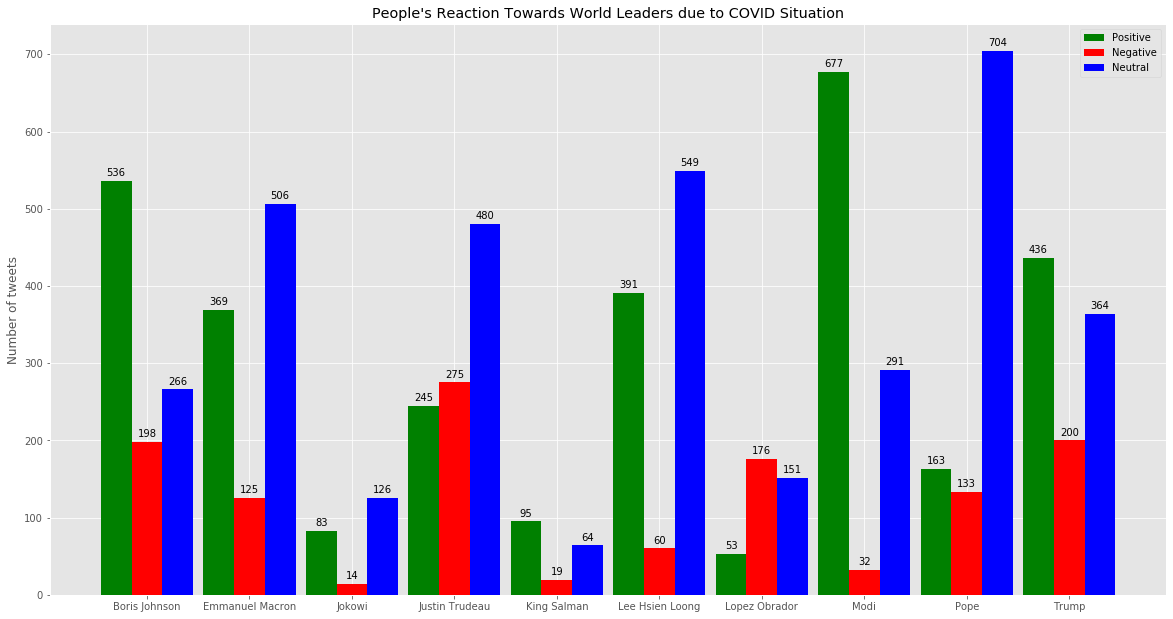

In [168]:
x = np.arange(len(leaders_list))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, positive_list, width=width,color='g', label='Positive',align='center')
rects2 = ax.bar(x , negative_list, width=width,color='r', label='Negative',align='center')
rects3 = ax.bar(x + width , neutral_list, width=width, color='b', label='Neutral',align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.figsize(8,5)
ax.set_ylabel('Number of tweets')
ax.set_title("People's Reaction Towards World Leaders due to COVID Situation")
ax.set_xticks(x)
ax.set_xticklabels(leaders_list)
#ax.autoscale(tight=True)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.set_size_inches(20, 10.5)
#fig.tight_layout()

plt.show()